In [1]:
# from google.colab import drive
import pandas as pd
# drive.mount('/content/drive')

import os
twitter = pd.read_csv("/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja_danych/Twitter_Sentiment_Analysis/data/twitter_outer_sentiment(1).csv", encoding='ISO-8859-1')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def check_date(date_string, month, day):
  if date_string[4:7] == month and date_string[8:10] == day:
    return True
  return False

def get_date_sentiment(month, day):
  date_sentiment = {"positive": 0, "negative":0, "neutral": 0}

  for idx, date in enumerate(twitter['date']):
    if check_date(date, month, day):
      match twitter['outer_sentiment'][idx]:
        case 4:
          date_sentiment['positive'] += 1
        case 2:
          date_sentiment['neutral'] += 1
        case 0:
          date_sentiment['negative'] += 1

  return date_sentiment

#via https://stackoverflow.com/a/60270421
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

def plot_date_sentiments(notable_dates):
  date_sentiments = []
  date_labels = []

  for date in notable_dates:
    date_name = date[0] + " " + date[1]
    date_sentiments.append(get_date_sentiment(date[0], date[1]))
    date_labels.append(date_name)

  negative = []
  neutral = []
  positive = []

  for i, _ in enumerate(date_labels):
    negative.append(date_sentiments[i]['negative'])
    neutral.append(date_sentiments[i]['neutral'])
    positive.append(date_sentiments[i]['positive'])

  data = {
      "negative": negative,
      "neutral": neutral,
      "positive": positive,
  }

  fig, ax = plt.subplots()
  bar_plot(ax, data, colors=["red", "grey", "green"])
  plt.xticks(range(len(date_labels)), date_labels)
  plt.show()


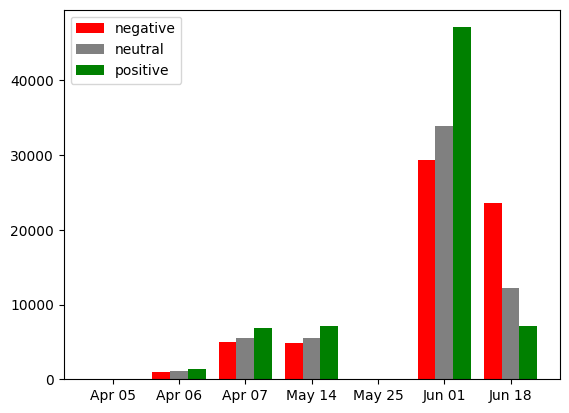

In [3]:
notable_dates = [["Apr", "05"], ["Apr", "06"], ["Apr", "07"], ["May", "14"], ["May", "25"], ["Jun", "01"], ["Jun", "18"]]

plot_date_sentiments(notable_dates)